___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In [42]:
# If you are using Anaconda, you can create a new environment with use of Anaconda terminal and codes below:
# conda create --name soldier
# conda install -c conda-forge ipykernel scikit-learn "numpy<1.25" pandas "shap== 0.35.0" matplotlib "seaborn==0.12.2" xgboost scikit-plot imbalanced-learn numba jinja2 ipywidgets

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

In [ ]:
# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models

#### 4. SMOTE
- Apply Imbalance Learning Techniques

#### 5. SHAP
- Apply Feature selection with SHAP


# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [5]:
import sklearn

print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.3.2


In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [9]:
import scipy.stats as stats
import statsmodels.api as sm
import xgboost as xgb
#import lightgbm as lgb
#import catboost as cb


In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [11]:
df_female = pd.read_csv('ANSUR II FEMALE Public.csv')

In [12]:
df_male = pd.read_csv('ANSUR II MALE Public.csv', encoding = " ISO-8859-1") 

## Explore Data

In [13]:
df_female.head().T

0           1           2  \
SubjectId                            10037       10038       10042   
abdominalextensiondepthsitting         231         194         183   
acromialheight                        1282        1379        1369   
acromionradialelength                  301         320         329   
anklecircumference                     204         207         233   
...                                    ...         ...         ...   
DODRace                                  2           3           1   
Age                                     26          21          23   
Heightin                                61          64          68   
Weightlbs                              142         120         147   
WritingPreference               Right hand  Right hand  Right hand   

                                         3           4  
SubjectId                            10043       10051  
abdominalextensiondepthsitting         261         309  
acromialheight                        1356        1303  
acromionradialelength                  306         308  
anklecircumference                     214         214  
...                                    ...         ...  
DODRace                                  2           1  
Age                                     22          45  
Heightin                                66          63  
Weightlbs                              175         195  
WritingPreference               Right hand  Right hand  

[108 rows x 5 columns]

In [14]:
df_male.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  ...                  Branch  PrimaryMOS  \
0                        369  ...             Combat Arms         19D   
1                        338  ...          Combat Support         68W   
2                        408  ...          Combat Support         68W   
3                        359  ...  Combat Service Support         88M   
4                        356  ...  Combat Service Support         92G   

   SubjectsBirthLocation  SubjectNumericRace  Ethnicity  DODRace  Age  \
0           North Dakota                   1        NaN        1   41   
1               New York                   1        NaN        1   35   
2               New York                   2        NaN        2   42   
3              Wisconsin                   1        NaN        1   31   
4         North Carolina                   2        NaN        2   21   

   Heightin  Weightlbs  WritingPreference  
0        71        180         Right hand  
1        68        160          Left hand  
2        68        205          Left hand  
3        66        175         Right hand  
4        77        213         Right hand  

[5 rows x 108 columns]

In [15]:
df_female.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    SubjectId                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [16]:
df_female.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [17]:
df_male.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [18]:
pd.options.display.max_rows = 300
pd.options.display.max_columns = 100

In [19]:
df_female.isna().sum()

SubjectId                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [20]:
df_male.isna().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [21]:
df_female.shape

(1986, 108)

In [22]:
df_male.shape

(4082, 108)

In [23]:
df_female = df_female.rename(columns = {"SubjectId":"subjectid"})

In [24]:
df = pd.concat([df_male, df_female], ignore_index=True)


In [25]:
df.shape

(6068, 108)

In [26]:
df.isnull().sum().any()

True

In [27]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [28]:
df.duplicated().sum()

0

In [29]:
NaN_list =[]
for col in df.columns:
    if df[col].isnull().sum()>0:
        print("{name} = {qty}".format(name = col, qty = df[col].isnull().sum()))
        NaN_list.append(col)

Ethnicity = 4647


In [30]:
df.drop(columns='Ethnicity', inplace = True)

In [31]:
df.shape

(6068, 107)

In [32]:
df.head().T

0               1               2  \
subjectid                              10027           10032           10033   
abdominalextensiondepthsitting           266             233             287   
acromialheight                          1467            1395            1430   
acromionradialelength                    337             326             341   
anklecircumference                       222             220             230   
axillaheight                            1347            1293            1327   
balloffootcircumference                  253             245             256   
balloffootlength                         202             193             196   
biacromialbreadth                        401             394             427   
bicepscircumferenceflexed                369             338             408   
bicristalbreadth                         274             257             261   
bideltoidbreadth                         493             479             544   
bimalleolarbreadth                        71              67              75   
bitragionchinarc                         319             344             345   
bitragionsubmandibulararc                291             320             330   
bizygomaticbreadth                       142             135             135   
buttockcircumference                     979             944            1054   
buttockdepth                             240             232             258   
buttockheight                            882             870             901   
buttockkneelength                        619             584             623   
buttockpopliteallength                   509             468             506   
calfcircumference                        373             357             412   
cervicaleheight                         1535            1471            1501   
chestbreadth                             291             269             288   
chestcircumference                      1074            1021            1120   
chestdepth                               259             253             267   
chestheight                             1292            1244            1288   
crotchheight                             877             851             854   
crotchlengthomphalion                    607             615             636   
crotchlengthposterioromphalion           351             376             359   
earbreadth                                36              33              40   
earlength                                 71              62              61   
earprotrusion                             19              18              23   
elbowrestheight                          247             232             237   
eyeheightsitting                         802             781             810   
footbreadthhorizontal                    101              98             103   
footlength                               273             263             270   
forearmcenterofgriplength                349             348             355   
forearmcircumferenceflexed               299             289             357   
forearmforearmbreadth                    575             523             575   
forearmhandlength                        477             476             491   
functionalleglength                     1136            1096            1115   
handbreadth                               90              86              93   
handcircumference                        214             203             220   
handlength                               193             195             203   
headbreadth                              150             146             148   
headcircumference                        583             568             573   
headlength                               206             201             202   
heelanklecircumference                   326             334             356   
heelbreadth                               7

SubjectNumericRace – Subject Numeric Race; a single or multi-digit code 
indicating a subject’s self-reported race or races (verified through interview). 
Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 
6 = Pacific Islander, 8 = Other

DODRace – Department of Defense Race; a single digit indicating a subject’s 
self-reported preferred single race where selecting multiple races is not an option. 
This variable is intended to be comparable to the Defense Manpower Data Center 
demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 
5 = Native American, 6 = Pacific Islander, 8 = Other

In [33]:
df[["DODRace","SubjectNumericRace"]]

DODRace  SubjectNumericRace
0           1                   1
1           1                   1
2           2                   2
3           1                   1
4           2                   2
...       ...                 ...
6063        3                   3
6064        3                   3
6065        2                   2
6066        3                   3
6067        3                   3

[6068 rows x 2 columns]

In [34]:
df.drop("SubjectNumericRace", axis = 1, inplace = True)

In [35]:
df.DODRace.value_counts(dropna=False)

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [36]:

# Count the values in the 'DODRace' column
race_counts = df['DODRace'].value_counts()

# Filter out the 'DODRace' values that have counts less than 500
filtered_races = race_counts[race_counts >= 500].index

# Keep only the rows where 'DODRace' is in the filtered_races
df = df[df['DODRace'].isin(filtered_races)]


In [37]:
df.DODRace.value_counts(dropna = False)

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

Heightin – Height in Inches; self-reported, comparable to measured “stature”
Weightlbs – Weight in Pounds; self-reported, comparable to measured “weightkg”

https://www.thesoldiersproject.org/us-military-height-and-weight-requirements/#:~:text=The%20Minimum%20Height%20is%205%20feet%201%20inch,lbs%20while%20the%20Maximum%20Weight%20is%20241%20lbs
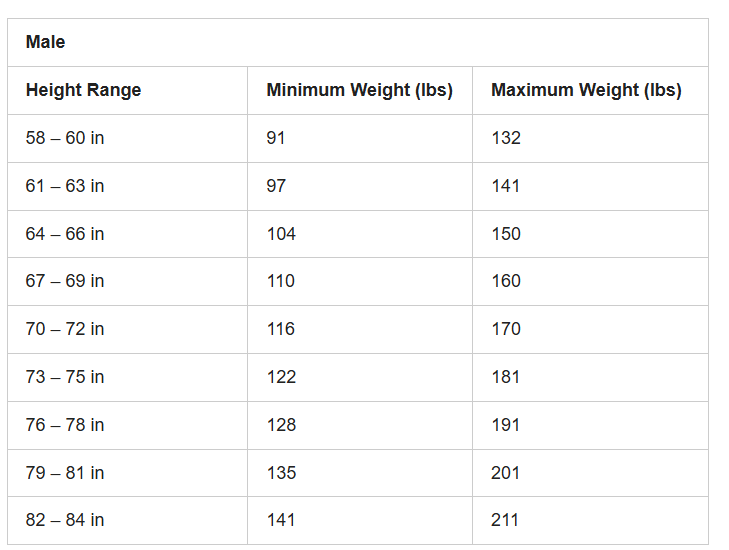


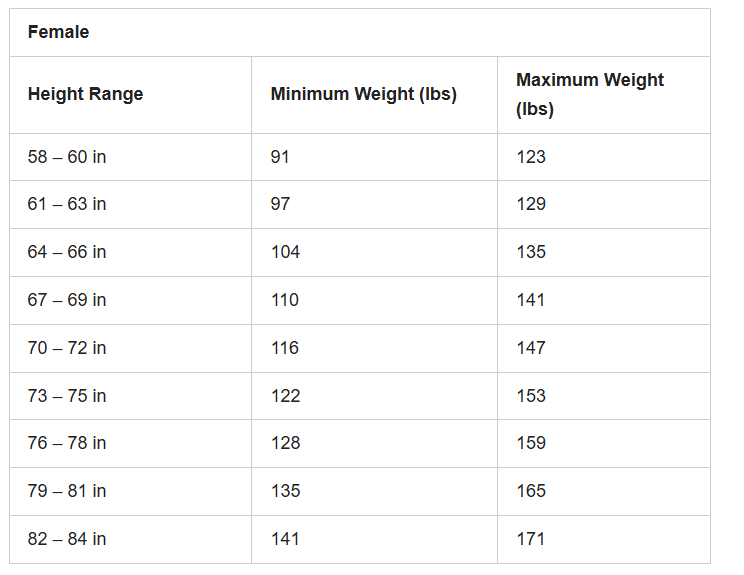

In [38]:
df[['Weightlbs','weightkg']]

Weightlbs  weightkg
0           180       815
1           160       726
2           205       929
3           175       794
4           213       946
...         ...       ...
6063        180       832
6064        150       717
6065        168       762
6066        133       632
6067        132       610

[5769 rows x 2 columns]

In [39]:
df.Weightlbs.value_counts()

Weightlbs
170    224
180    219
150    216
175    204
160    203
185    202
165    194
190    186
200    173
155    154
210    147
140    146
195    142
145    140
135    117
220    113
215    109
130    100
205     96
225     76
230     71
148     55
125     53
168     53
178     52
120     49
240     48
158     46
187     44
138     43
235     42
198     41
153     41
167     35
174     35
162     35
173     34
128     34
127     33
250     33
147     33
143     32
172     32
169     32
152     31
183     31
156     31
188     31
182     31
157     31
154     30
137     30
193     29
184     28
194     28
197     28
163     28
196     28
142     27
192     26
181     26
177     26
132     25
176     24
245     22
161     22
212     22
115     21
203     21
133     21
186     21
164     21
218     21
189     20
110     20
204     20
208     19
166     19
171     19
124     18
139     18
118     18
149     18
136     18
179     18
141     18
206     18
207     18
260     17
144     17


In [40]:
df.weightkg.value_counts()

weightkg
791     24
842     23
882     23
695     22
809     21
        ..
1301     1
1202     1
1219     1
1265     1
464      1
Name: count, Length: 774, dtype: int64

In [41]:
df. weightkg = df.weightkg / 10

In [42]:
df = df[(df.Weightlbs >=90) & (df.Weightlbs <= 220)]
df

subjectid  abdominalextensiondepthsitting  acromialheight  \
0         10027                             266            1467   
1         10032                             233            1395   
2         10033                             287            1430   
3         10092                             234            1347   
4         10093                             250            1585   
...         ...                             ...             ...   
6063      29501                             285            1392   
6064      29502                             262            1324   
6065      29503                             260            1334   
6066      29511                             205            1293   
6067     920103                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
6063                    335                 223          1297   
6064                    301                 202          1204   
6065                    318                 213          1259   
6066                    302                 199          1207   
6067                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
6063                      252               196                368   
6064                      236               181                378   
6065                      234               183                363   
6066                      213               163                376   
6067                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           369               274               493   
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
6063                        299               312               477   
6064                        294               287               468   
6065                        332               299               460   
6066                        276               280               426   
6067                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                     71               319                        291   
1                     67               344                        320   
2                     75               345                        330   
3                     73               328                        309   
4                     80               340                        310   
...                  ...               ...                        ...   
6063                  72               306                        282   
6064                  66               309                        311   
6065                  70               317                        311

In [43]:
df.Heightin.value_counts(dropna = False)

Heightin
69    566
66    516
70    503
68    493
67    477
71    455
72    382
64    368
65    297
63    248
73    221
62    208
74    165
61     89
60     72
75     70
76     37
59     29
77     19
78      9
80      6
57      5
58      4
79      3
81      2
94      1
56      1
87      1
86      1
Name: count, dtype: int64

In [44]:
df[['Heightin', 'stature']]

Heightin  stature
0           71     1776
1           68     1702
2           68     1735
3           66     1655
4           77     1914
...        ...      ...
6063        67     1687
6064        63     1613
6065        66     1644
6066        63     1616
6067        66     1641

[5248 rows x 2 columns]

In [45]:
df = df[(df.Heightin >= 58) & (df.Heightin <= 84)]

In [46]:
df

subjectid  abdominalextensiondepthsitting  acromialheight  \
0         10027                             266            1467   
1         10032                             233            1395   
2         10033                             287            1430   
3         10092                             234            1347   
4         10093                             250            1585   
...         ...                             ...             ...   
6063      29501                             285            1392   
6064      29502                             262            1324   
6065      29503                             260            1334   
6066      29511                             205            1293   
6067     920103                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
6063                    335                 223          1297   
6064                    301                 202          1204   
6065                    318                 213          1259   
6066                    302                 199          1207   
6067                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
6063                      252               196                368   
6064                      236               181                378   
6065                      234               183                363   
6066                      213               163                376   
6067                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           369               274               493   
1                           338               257               479   
2                           408               261               544   
3                           359               262               518   
4                           356               263               524   
...                         ...               ...               ...   
6063                        299               312               477   
6064                        294               287               468   
6065                        332               299               460   
6066                        276               280               426   
6067                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                     71               319                        291   
1                     67               344                        320   
2                     75               345                        330   
3                     73               328                        309   
4                     80               340                        310   
...                  ...               ...                        ...   
6063                  72               306                        282   
6064                  66               309                        311   
6065                  70               317                        311

I've found 2 columns with the same information about weight in my dataset.Since the 'weightlbs','weightkg' columns give similar values, I drop the 'weightkg' column. 

In [47]:
df.drop(["Weightlbs"], axis = 1, inplace=True)

In [48]:
df.reset_index(drop=True, inplace=True)

In [49]:
df.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        369               274               493   
1                        338               257               479   
2                        408               261               544   
3                        359               262               518   
4                        356               263               524   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  71               319                        291   
1                  67               344                        320   
2                  75               345                        330   
3                  73               328                        309   
4                  80               340                        310   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 142                   979           240            882   
1                 135                   944           232            870   
2                 135                  1054           258            901   
3                 143                   991           242            821   
4                 138                  1029           275           1080   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                619                     509                373   
1                584                     468                357   
2                623                     506                412   
3                560                     437                395   
4                706                     567                425   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1535           291                1074         259         1292   
1             1471           269                1021         253         1244   
2             1501           288                1120         267         1288   
3             1423           296                1114         262         1205   
4             1684           304                1048         232         1452   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           877                    607                             351   
1           851                    615                             376   
2           854                    636                             359   
3           769                    590                             341   
4          1014                    682                             382   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          36         71             19              247               802   
1          33         62             18              232        

In [50]:
df.shape

(5239, 105)

In [51]:
df.drop(["Heightin"], axis = 1, inplace=True)

# Let's examine object columns

In [52]:
df.select_dtypes(include=['object'])

Gender       Date Installation            Component  \
0       Male   4-Oct-10    Fort Hood         Regular Army   
1       Male   4-Oct-10    Fort Hood         Regular Army   
2       Male   4-Oct-10    Fort Hood         Regular Army   
3       Male  12-Oct-10    Fort Hood         Regular Army   
4       Male  12-Oct-10    Fort Hood         Regular Army   
...      ...        ...          ...                  ...   
5234  Female   5-Apr-12  Camp Shelby  Army National Guard   
5235  Female   5-Apr-12  Camp Shelby  Army National Guard   
5236  Female   5-Apr-12  Camp Shelby  Army National Guard   
5237  Female   5-Apr-12  Camp Shelby  Army National Guard   
5238  Female  28-May-11   Fort McCoy  Army National Guard   

                      Branch PrimaryMOS SubjectsBirthLocation  \
0                Combat Arms        19D          North Dakota   
1             Combat Support        68W              New York   
2             Combat Support        68W              New York   
3     Combat Service Support        88M             Wisconsin   
4     Combat Service Support        92G        North Carolina   
...                      ...        ...                   ...   
5234          Combat Support        42A                 Texas   
5235          Combat Support        25U                 Texas   
5236          Combat Support        42A                 Texas   
5237          Combat Support        92Y                 Texas   
5238          Combat Support        92F                 Texas   

     WritingPreference  
0           Right hand  
1            Left hand  
2            Left hand  
3           Right hand  
4           Right hand  
...                ...  
5234        Right hand  
5235        Right hand  
5236        Right hand  
5237        Right hand  
5238        Right hand  

[5239 rows x 8 columns]

In [53]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object')

In [54]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col} has {df[col].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 275 unique value
SubjectsBirthLocation has 133 unique value
WritingPreference has 3 unique value


# Installation 

– U.S. Army installation where the measurement occurred;

In [55]:
df.Installation.value_counts()

Installation
Camp Shelby       1020
Fort Bliss         829
Fort Gordon        615
Fort McCoy         381
Camp Atterbury     366
Fort Hood          360
Fort Huachuca      360
Fort Lee           352
Fort Bragg         348
Fort Drum          316
Fort Stewart       291
Fort Rucker          1
Name: count, dtype: int64

Since the Intallation column is not a column that directly affects DODRace and I do not want to increase the number of columns when we make a dummy, I drop this column.

In [56]:
df.drop(columns='Installation', axis = 1 , inplace=True)

# Date

Date – Date the participant was measured, ranging from “04-Oct-10” to “05-Apr-12”

In [57]:
df.Date.nunique()

253

In [58]:
df.drop(columns='Date', inplace = True)

In [59]:
df.drop(columns= ["Component","PrimaryMOS", 'Branch'], inplace= True)

In [60]:
df.shape

(5239, 99)

In [61]:
df.drop(columns = 'subjectid', inplace = True)

In [62]:
df.shape

(5239, 98)

In [63]:
df["DODRace"] = df.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic"})
df.DODRace.value_counts()

DODRace
White       3425
Black       1174
Hispanic     640
Name: count, dtype: int64

In [64]:
df.select_dtypes(include = 'O')

Gender SubjectsBirthLocation   DODRace WritingPreference
0       Male          North Dakota     White        Right hand
1       Male              New York     White         Left hand
2       Male              New York     Black         Left hand
3       Male             Wisconsin     White        Right hand
4       Male        North Carolina     Black        Right hand
...      ...                   ...       ...               ...
5234  Female                 Texas  Hispanic        Right hand
5235  Female                 Texas  Hispanic        Right hand
5236  Female                 Texas     Black        Right hand
5237  Female                 Texas  Hispanic        Right hand
5238  Female                 Texas  Hispanic        Right hand

[5239 rows x 4 columns]

In [65]:
df.SubjectsBirthLocation.value_counts(dropna = True)

SubjectsBirthLocation
California                384
New York                  374
Texas                     355
Indiana                   228
Florida                   194
Oklahoma                  190
Illinois                  185
Minnesota                 179
Michigan                  168
Mississippi               161
Georgia                   153
Alabama                   146
South Carolina            144
North Carolina            135
Ohio                      129
Louisiana                 126
Pennsylvania              117
Virginia                  106
Massachusetts             103
Germany                    86
New Jersey                 84
Wisconsin                  83
Puerto Rico                80
Missouri                   75
Maryland                   74
Arizona                    71
Tennessee                  70
Colorado                   69
Kentucky                   58
Kansas                     56
Washington                 55
Arkansas                   48
Iowa              

In [66]:
df = df[df['SubjectsBirthLocation'].map(df['SubjectsBirthLocation'].value_counts()) >= 10]

In [67]:
df.shape

(5028, 98)

In [68]:
df.describe().T

count     mean     std      min      25%  \
abdominalextensiondepthsitting 5028.000  241.486  32.651  155.000  217.000   
acromialheight                 5028.000 1400.636  74.111 1181.000 1347.750   
acromionradialelength          5028.000  326.349  19.593  260.000  313.000   
anklecircumference             5028.000  223.180  14.524  170.000  213.000   
axillaheight                   5028.000 1295.363  68.128 1082.000 1248.000   
balloffootcircumference        5028.000  242.424  15.755  194.000  231.000   
balloffootlength               5028.000  193.824  12.832  151.000  185.000   
biacromialbreadth              5028.000  396.578  28.628  311.000  375.000   
bicepscircumferenceflexed      5028.000  335.663  37.064  216.000  309.000   
bicristalbreadth               5028.000  273.016  18.286  197.000  261.000   
bideltoidbreadth               5028.000  485.347  37.320  358.000  458.000   
bimalleolarbreadth             5028.000   71.782   5.040   55.000   68.000   
bitragionchinarc               5028.000  322.936  16.079  267.000  313.000   
bitragionsubmandibulararc      5028.000  304.113  19.395  245.000  291.000   
bizygomaticbreadth             5028.000  138.670   6.840  116.000  134.000   
buttockcircumference           5028.000 1011.157  67.530  770.000  965.000   
buttockdepth                   5028.000  238.160  23.089  168.000  221.000   
buttockheight                  5028.000  867.598  51.823  695.000  831.000   
buttockkneelength              5028.000  606.595  30.543  501.000  586.000   
buttockpopliteallength         5028.000  495.845  27.093  405.000  477.000   
calfcircumference              5028.000  381.877  27.024  282.000  363.000   
cervicaleheight                5028.000 1471.747  79.724 1237.000 1415.000   
chestbreadth                   5028.000  280.903  19.023  213.000  268.000   
chestcircumference             5028.000 1008.613  88.077  695.000  945.000   
chestdepth                     5028.000  248.570  24.197  170.000  232.000   
chestheight                    5028.000 1246.881  75.927 1017.000 1193.000   
crotchheight                   5028.000  822.921  52.374  639.000  786.000   
crotchlengthomphalion          5028.000  617.790  41.646  473.000  589.000   
crotchlengthposterioromphalion 5028.000  350.086  28.584  243.000  330.000   
earbreadth                     5028.000   35.042   3.176   25.000   33.000   
earlength                      5028.000   62.243   4.750   46.000   59.000   
earprotrusion                  5028.000   22.128   3.150   13.000   20.000   
elbowrestheight                5028.000  238.676  27.604  138.000  221.000   
eyeheightsitting               5028.000  782.935  40.420  654.000  755.000   
footbreadthhorizontal          5028.000   98.121   6.218   77.000   94.000   
footlength                     5028.000  261.780  16.563  210.000  250.000   
forearmcenterofgriplength      5028.000  337.228  22.079  265.000  321.000   
forearmcircumferenceflexed     5028.000  291.619  27.245  200.000  271.000   
forearmforearmbreadth          5028.000  544.285  56.120  376.000  503.000   
forearmhandlength              5028.000  465.123  28.500  375.000  445.000   
functionalleglength            5028.000 1097.271  63.715  901.000 1053.000   
handbreadth                    5028.000   84.476   6.083   67.000   80.000   
handcircumference              5028.000  202.623  14.891  160.000  191.000   
handlength                     5028.000  188.503  10.931  155.000  181.000   
headbreadth                    5028.000  151.480   5.974  131.000  147.000   
headcircumference              5028.000  568.771  17.590  502.000  557.000   
headlength                     5028.000  196.041   8.075  168.000  191.000   
heelanklecircumference         5028.000  330.344  20.480  264.000  315.750   
heelbreadth                    5028.000   70.137   5.531   53.000   66.000   
hipbreadth                     5028.000  346.055  23.284  264.000  331.000   
hipbreadthsitting              5028.000  382.778  30.343

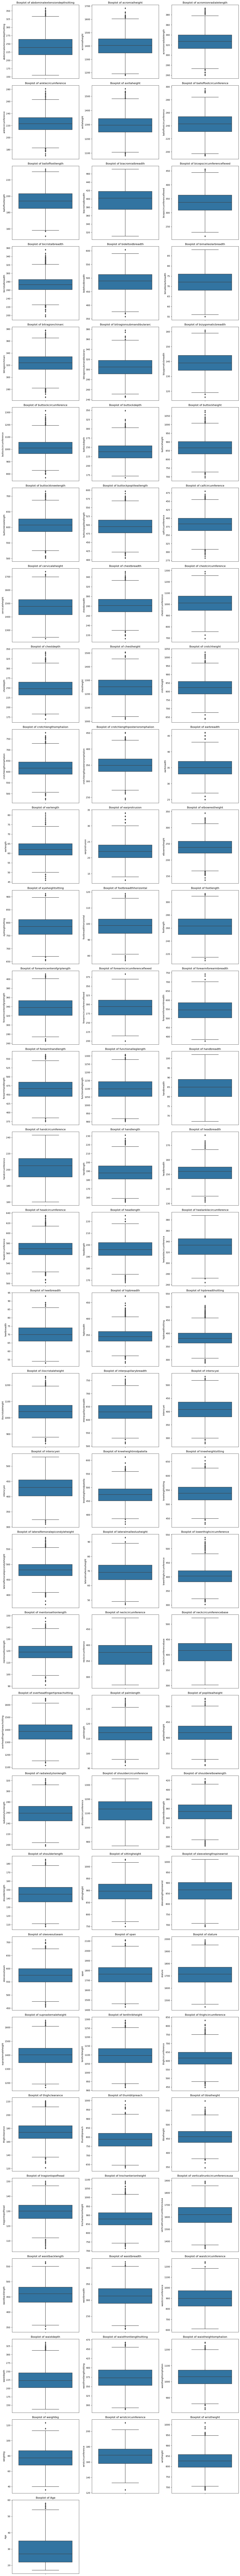

In [69]:
numeric_columns = df.select_dtypes(include=['number'])

ncols = 3
num_plots = len(numeric_columns.columns)
nrows = (num_plots - 1) // ncols + 1

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

for i, column in enumerate(numeric_columns.columns):
    row = i // ncols
    col = i % ncols
    sns.boxplot(data=numeric_columns, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [70]:
df.duplicated().sum()

0

In [71]:
corr_matrix = df.corr(numeric_only = True)

high_corr_columns = []

threshold = 0.9  

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value = corr_matrix.iloc[i, j]
        if corr_value > threshold or corr_value < -threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr_columns.append((col1, col2, corr_value))

print("Columns with High Correlation:")
for col1, col2, corr_value in high_corr_columns:
    print(f"{col1} and {col2} - Correlation Value: {corr_value:.2f}")

Columns with High Correlation:
axillaheight and acromialheight - Correlation Value: 0.99
buttockpopliteallength and buttockkneelength - Correlation Value: 0.95
cervicaleheight and acromialheight - Correlation Value: 0.98
cervicaleheight and axillaheight - Correlation Value: 0.97
chestheight and acromialheight - Correlation Value: 0.96
chestheight and axillaheight - Correlation Value: 0.95
chestheight and cervicaleheight - Correlation Value: 0.96
crotchheight and axillaheight - Correlation Value: 0.91
crotchheight and buttockheight - Correlation Value: 0.92
crotchheight and cervicaleheight - Correlation Value: 0.90
footbreadthhorizontal and balloffootcircumference - Correlation Value: 0.91
footlength and balloffootlength - Correlation Value: 0.96
forearmforearmbreadth and bideltoidbreadth - Correlation Value: 0.91
forearmhandlength and forearmcenterofgriplength - Correlation Value: 0.96
handcircumference and handbreadth - Correlation Value: 0.96
hipbreadth and buttockcircumference - Cor

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

# Train| Test Split

In [72]:
X = df.drop(columns = 'DODRace', axis = 1)
y = df.DODRace

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y, random_state = 101)

# OrdinalEncoder and Categoric Variables

In [74]:
cat = X_train.select_dtypes('O').columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

# Modeling with Pipeline

In [78]:
import sklearn

print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.3.2


In [79]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)

column_trans = make_column_transformer((onehot_enc, cat),
                                       remainder = 'passthrough',
                                       verbose_feature_names_out = False).set_output(transform = 'pandas')
                                        

In [80]:
column_trans.fit_transform(X_train)

Gender_Female  Gender_Male  SubjectsBirthLocation_Alabama  \
2304          0.000        1.000                          0.000   
540           0.000        1.000                          0.000   
3659          1.000        0.000                          0.000   
1057          0.000        1.000                          0.000   
5237          1.000        0.000                          0.000   
...             ...          ...                            ...   
1282          0.000        1.000                          0.000   
916           0.000        1.000                          0.000   
1454          0.000        1.000                          0.000   
881           0.000        1.000                          0.000   
3450          1.000        0.000                          1.000   

      SubjectsBirthLocation_Arizona  SubjectsBirthLocation_Arkansas  \
2304                          0.000                           0.000   
540                           0.000                           0.000   
3659                          0.000                           0.000   
1057                          0.000                           0.000   
5237                          0.000                           0.000   
...                             ...                             ...   
1282                          0.000                           0.000   
916                           0.000                           0.000   
1454                          0.000                           0.000   
881                           0.000                           0.000   
3450                          0.000                           0.000   

      SubjectsBirthLocation_California  SubjectsBirthLocation_Colombia  \
2304                             0.000                           0.000   
540                              1.000                           0.000   
3659                             0.000                           0.000   
1057                             0.000                           0.000   
5237                             0.000                           0.000   
...                                ...                             ...   
1282                             0.000                           0.000   
916                              0.000                           0.000   
1454                             0.000                           0.000   
881                              0.000                           0.000   
3450                             0.000                           0.000   

      SubjectsBirthLocation_Colorado  SubjectsBirthLocation_Connecticut  \
2304                           0.000                              0.000   
540                            0.000                              0.000   
3659                           0.000                              0.000   
1057                           0.000                              0.000   
5237                           0.000                              0.000   
...                              ...                                ...   
1282                           0.000                              0.000   
916                            0.000                              0.000   
1454                           0.000                              0.000   
881                            0.000                              0.000   
3450                           0.000                              0.000   

      SubjectsBirthLocation_Delaware  \
2304                           0.000   
540                            0.000   
3659                           0.000   
1057                           0.000   
5237                           0.000   
...                              ...   
1282                           0.000   
916                            0.000   
1454                           0.000   
881                            0.000   
3450                           0.000   

      SubjectsBirthLocation_District of Columbia  \
2304                     

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [82]:
operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()), ('logistic', LogisticRegression())]

pipe_model = Pipeline(steps = operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression())])

### Vanilla Logistic Model

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# With Default Parameters

In [84]:
y_pred = pipe_model.predict(X_test)
y_pred

array(['White', 'White', 'White', ..., 'White', 'White', 'White'],
      dtype=object)

In [85]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[7.27421006e-03, 1.39169945e-01, 8.53555845e-01],
       [1.62477291e-02, 1.57420241e-03, 9.82178069e-01],
       [1.63363055e-02, 9.99942801e-03, 9.73664266e-01],
       ...,
       [2.67416563e-02, 1.15467199e-02, 9.61711624e-01],
       [1.00144005e-02, 2.81719034e-01, 7.08266565e-01],
       [9.58813401e-04, 2.10650388e-03, 9.96934683e-01]])

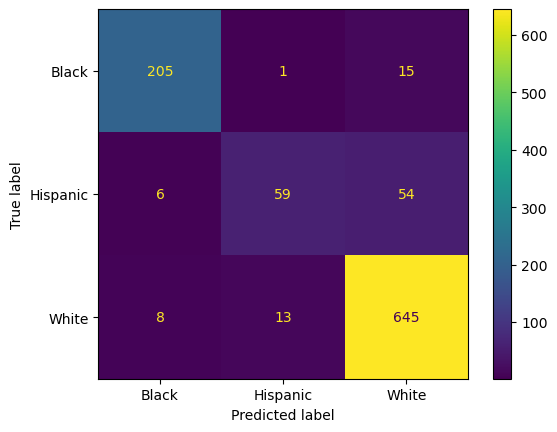

In [86]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [87]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print('Test_Set')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print('Train_Set')
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [88]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[205   1  15]
 [  6  59  54]
 [  8  13 645]]
              precision    recall  f1-score   support

       Black       0.94      0.93      0.93       221
    Hispanic       0.81      0.50      0.61       119
       White       0.90      0.97      0.93       666

    accuracy                           0.90      1006
   macro avg       0.88      0.80      0.83      1006
weighted avg       0.90      0.90      0.90      1006


Train_Set
[[ 813   14   59]
 [  24  279  171]
 [  19   52 2591]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93       886
    Hispanic       0.81      0.59      0.68       474
       White       0.92      0.97      0.95      2662

    accuracy                           0.92      4022
   macro avg       0.89      0.83      0.85      4022
weighted avg       0.91      0.92      0.91      4022



# Cross Validate

In [89]:
from sklearn.model_selection import cross_validate

operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()), ('logistic', LogisticRegression())]

pipe_model = Pipeline(steps = operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision_macro','recall_macro',
                                                                   'f1_macro'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.907
train_accuracy          0.917
test_precision_macro    0.879
train_precision_macro   0.896
test_recall_macro       0.809
train_recall_macro      0.827
test_f1_macro           0.836
train_f1_macro          0.855
dtype: float64

# Cross Validate for Hispanic

In [90]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


f1_Hispanic = make_scorer(f1_score,pos_label = 'Hispanic', average = None, labels =["Hispanic"])
precision_Hispanic = make_scorer(precision_score, pos_label = 'Hispanic', average = None, labels =["Hispanic"])
recall_Hispanic = make_scorer(recall_score, pos_label = 'Hispanic', average = None, labels =["Hispanic"])


scoring = {"f1_Hispanic":f1_Hispanic,
           "precision_Hispanic":precision_Hispanic,
           "recall_Hispanic":recall_Hispanic}

In [91]:
from sklearn.model_selection import StratifiedKFold

operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()), ('logistic', LogisticRegression())]

pipe_model = Pipeline(steps = operations)

scoring = {
           "f1_Hispanic":f1_Hispanic,
           "precision_Hispanic":precision_Hispanic,
           "recall_Hispanic":recall_Hispanic
}

cv = StratifiedKFold(n_splits =10, shuffle = True, random_state = 101)

scores = cross_validate(pipe_model, X, y, scoring = scoring, cv = cv, return_train_score = True)

df_scores = pd.DataFrame(scores, index = range(1,11))

print(df_scores.mean()[2:])


test_f1_Hispanic           0.642
train_f1_Hispanic          0.676
test_precision_Hispanic    0.782
train_precision_Hispanic   0.820
test_recall_Hispanic       0.546
train_recall_Hispanic      0.574
dtype: float64


In [92]:
operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()), ('logistic', LogisticRegression())]

pipe_model = Pipeline(steps = operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score = True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.648
train_f1_Hispanic          0.685
test_precision_Hispanic    0.781
train_precision_Hispanic   0.819
test_recall_Hispanic       0.555
train_recall_Hispanic      0.588
dtype: float64

### Logistic Model GridsearchCV

In [93]:
f1_Hispanic = make_scorer(f1_score,pos_label = 'Hispanic', average = None, labels =["Hispanic"])

In [94]:
operations = [
    ('OrdinalEncoder', column_trans), 
    ('scaler', MinMaxScaler()), 
    ('logistic', LogisticRegression())
]

pipe_model = Pipeline(steps=operations)


penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C}


In [95]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

grid_search = GridSearchCV(pipe_model, param_grid, cv=cv, scoring=f1_Hispanic, return_train_score=True)

In [96]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True,
             scoring=make_scorer(f1_score, pos_label=Hispanic, average=None, labels=['Hispanic']))

In [97]:
grid_search.best_params_

{'logistic__C': 5, 'logistic__penalty': 'l2'}

In [98]:
grid_search.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression(C=5))])

In [99]:
pd.DataFrame(grid_search.cv_results_).loc[grid_search.best_index_, ['mean_test_score', 'mean_train_score']]

mean_test_score    0.672
mean_train_score   0.708
Name: 7, dtype: object

In [100]:
y_pred = grid_search.predict(X_test)
y_pred

array(['White', 'White', 'White', ..., 'White', 'White', 'White'],
      dtype=object)

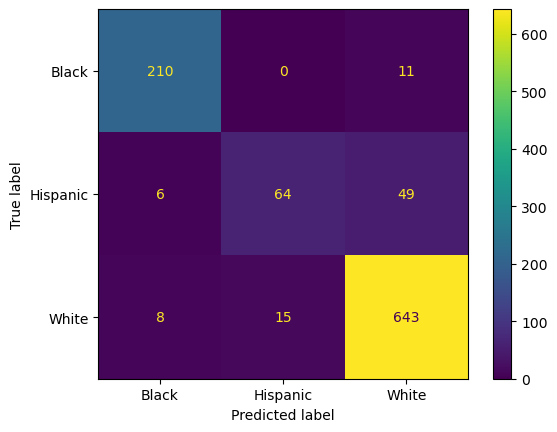

In [101]:
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test);

In [102]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[210   0  11]
 [  6  64  49]
 [  8  15 643]]
              precision    recall  f1-score   support

       Black       0.94      0.95      0.94       221
    Hispanic       0.81      0.54      0.65       119
       White       0.91      0.97      0.94       666

    accuracy                           0.91      1006
   macro avg       0.89      0.82      0.84      1006
weighted avg       0.91      0.91      0.91      1006


Train_Set
[[ 826   13   47]
 [  21  301  152]
 [  22   60 2580]]
              precision    recall  f1-score   support

       Black       0.95      0.93      0.94       886
    Hispanic       0.80      0.64      0.71       474
       White       0.93      0.97      0.95      2662

    accuracy                           0.92      4022
   macro avg       0.89      0.85      0.87      4022
weighted avg       0.92      0.92      0.92      4022



In [103]:
operations = [
    ('OneHotEncoder', column_trans), 
    ('scaler', MinMaxScaler()), 
    ('logistic', LogisticRegression(class_weight = 'balanced', C = 5, solver ='liblinear',
                                    penalty = 'l2', 
                                    random_state = 101))
]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                       X_train,
                       y_train,
                       scoring = scoring,
                       cv = 10,
                       return_train_score = True)

df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]


test_f1_Hispanic           0.653
train_f1_Hispanic          0.709
test_precision_Hispanic    0.657
train_precision_Hispanic   0.707
test_recall_Hispanic       0.652
train_recall_Hispanic      0.711
dtype: float64

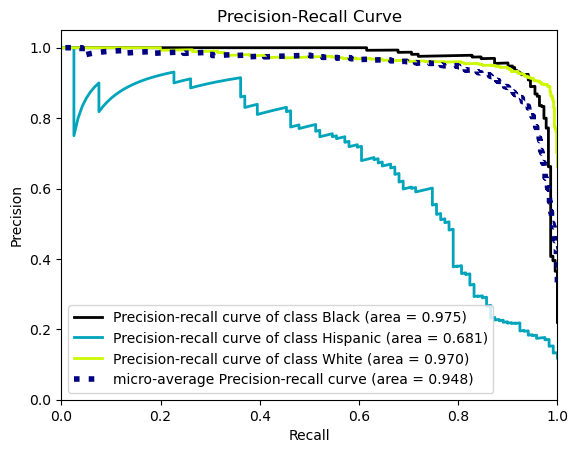

In [104]:
from scikitplot.metrics import plot_roc, plot_precision_recall, plot_precision_recall

operations = [
    ('OrdinalEncoder', column_trans), 
    ('scaler', MinMaxScaler()), 
    ('logistic', LogisticRegression(class_weight = 'balanced', C =5, solver ='liblinear',
                                    penalty = 'l2', 
                                    random_state = 101))
]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

y_pred_proba = pipe_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [105]:
pd.get_dummies(y_test).values

array([[False, False,  True],
       [False, False,  True],
       [False, False,  True],
       ...,
       [False, False,  True],
       [False, False,  True],
       [False, False,  True]])

In [106]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.681318271510991

In [107]:
y_pred = grid_search.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_precision = precision_score(y_test, y_pred, average = None, labels = ['Hispanic'])
log_recall = recall_score(y_test, y_pred, average = None, labels = ['Hispanic'])

print(log_AP)
print(log_precision)
print(log_recall)

0.681318271510991
[0.81012658]
[0.53781513]


## 2. SVC

### Vanilla SVC model

In [108]:
operations = [
    ('OneHotEncoder', column_trans), 
    ('scaler', MinMaxScaler()), 
    ('svc', SVC(class_weight = 'balanced', random_state = 101))
]

svc_model = Pipeline(steps=operations)

svc_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [109]:
eval_metric(svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[204   9   8]
 [  5  87  27]
 [ 16  78 572]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       221
    Hispanic       0.50      0.73      0.59       119
       White       0.94      0.86      0.90       666

    accuracy                           0.86      1006
   macro avg       0.78      0.84      0.80      1006
weighted avg       0.88      0.86      0.87      1006


Train_Set
[[ 832   29   25]
 [  16  406   52]
 [  53  322 2287]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       886
    Hispanic       0.54      0.86      0.66       474
       White       0.97      0.86      0.91      2662

    accuracy                           0.88      4022
   macro avg       0.81      0.88      0.83      4022
weighted avg       0.91      0.88      0.89      4022



# SVC Model Cross Validation

In [110]:
from sklearn.model_selection import cross_validate

operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()), ('svc', SVC())]

svc_model = Pipeline(steps = operations)

scores = cross_validate(svc_model, X_train, y_train, scoring = ['accuracy', 'precision_macro','recall_macro',
                                                                   'f1_macro'], cv = 10, n_jobs = -1, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.888
train_accuracy          0.900
test_precision_macro    0.915
train_precision_macro   0.931
test_recall_macro       0.734
train_recall_macro      0.755
test_f1_macro           0.776
train_f1_macro          0.798
dtype: float64

# SVC Model Gridsearch

In [111]:
recall_Hispanic =  make_scorer(recall_score, pos_label='Hispanic', average=None, labels=["Hispanic"])

In [112]:
param_grid = {
    'svc__C': [0.01,0.1,0.3,1.0],
    'svc__gamma': ['scale', 'auto', 0.2],
    'svc__kernel': ['linear','rbf'],
    
}

In [113]:
operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()),
              ('svc', SVC(class_weight = 'balanced',
                                              random_state = 42))]

pipe_model = Pipeline(steps = operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid=param_grid,
                              scoring=recall_Hispanic,
                              cv=10, 
                              n_jobs=-1, 
                              verbose=2,
                             return_train_score = True)

In [114]:
svm_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 0.3, 1.0],
                         'svc__gamma': ['scale', 'auto', 0.2],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True,
             scoring=make_scorer(recall_score, pos_label=Hispanic, average=None, labels=['Hispanic']),
             verbose=2)

In [115]:
svm_model_grid.best_params_

{'svc__C': 0.3, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [116]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('svc',
                 SVC(C=0.3, class_weight='balanced', kernel='linear',
                     random_state=42))])

In [117]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.770
mean_train_score   0.832
Name: 12, dtype: object

In [118]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[208   6   7]
 [  5  90  24]
 [ 22  74 570]]
              precision    recall  f1-score   support

       Black       0.89      0.94      0.91       221
    Hispanic       0.53      0.76      0.62       119
       White       0.95      0.86      0.90       666

    accuracy                           0.86      1006
   macro avg       0.79      0.85      0.81      1006
weighted avg       0.88      0.86      0.87      1006


Train_Set
[[ 830   34   22]
 [  19  391   64]
 [  59  317 2286]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93       886
    Hispanic       0.53      0.82      0.64       474
       White       0.96      0.86      0.91      2662

    accuracy                           0.87      4022
   macro avg       0.80      0.87      0.83      4022
weighted avg       0.90      0.87      0.88      4022



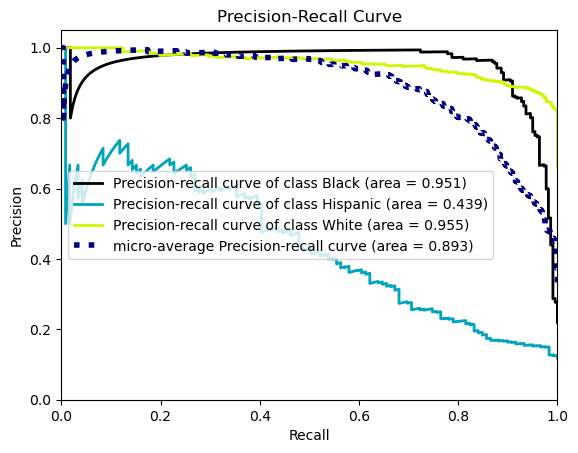

In [119]:
operations = [("OneHot_Encoder", column_trans), 
              ("svc", SVC(class_weight = 'balanced', kernel = 'linear',
                                              C = 0.01,
                                              random_state = 101))]


svc_model = Pipeline(steps=operations)

svc_model.fit(X_train, y_train)

decision_function = svc_model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test) # should not use predict_proba  . should use decision func.
    
plot_precision_recall(y_test, decision_function)
plt.show();

In [120]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

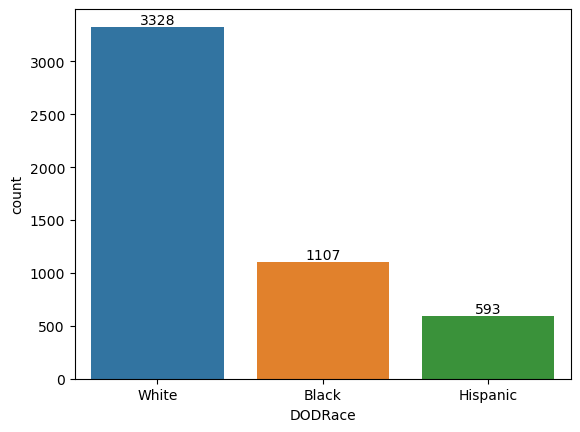

In [121]:
ax = sns.countplot(x="DODRace", data = df)
ax.bar_label(ax.containers[0]);

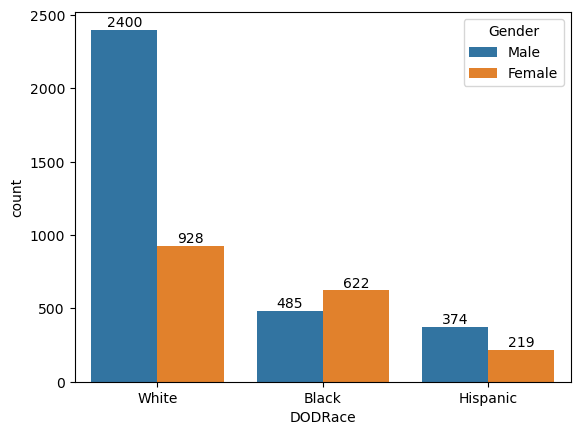

In [122]:
ax = sns.countplot(x="DODRace", data = df, hue = "Gender")
for p in ax.containers:
    ax.bar_label(p)

In [123]:
X = df.drop('DODRace', axis = 1)
y = df.DODRace

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [125]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [126]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")


In [127]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=42))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=42))])

In [128]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [129]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[169   2  50]
 [ 16   6  97]
 [ 16   3 647]]
              precision    recall  f1-score   support

       Black       0.84      0.76      0.80       221
    Hispanic       0.55      0.05      0.09       119
       White       0.81      0.97      0.89       666

    accuracy                           0.82      1006
   macro avg       0.73      0.60      0.59      1006
weighted avg       0.79      0.82      0.77      1006


Train_Set
[[ 886    0    0]
 [   0  474    0]
 [   0    0 2662]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       886
    Hispanic       1.00      1.00      1.00       474
       White       1.00      1.00      1.00      2662

    accuracy                           1.00      4022
   macro avg       1.00      1.00      1.00      4022
weighted avg       1.00      1.00      1.00      4022



In [130]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=42))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy",
                                 "precision_macro",
                                 "recall_macro",
                                 "f1_macro"],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy           0.819
train_accuracy          1.000
test_precision_macro    0.763
train_precision_macro   1.000
test_recall_macro       0.597
train_recall_macro      1.000
test_f1_macro           0.604
train_f1_macro          1.000
dtype: float64

In [131]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=42))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy",
                                 "precision_micro",
                                 "recall_micro",
                                 "f1_micro"],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.819
train_accuracy          1.000
test_precision_micro    0.819
train_precision_micro   1.000
test_recall_micro       0.819
train_recall_micro      1.000
test_f1_micro           0.819
train_f1_micro          1.000
dtype: float64

In [132]:
operations = [("ColumnTransformer", column_trans), 
              ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                  random_state=42))]


rf_model = Pipeline(steps=operations)

scores = cross_validate(rf_model,
                        X_train, 
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.082
train_f1_Hispanic          1.000
test_precision_Hispanic    0.588
train_precision_Hispanic   1.000
test_recall_Hispanic       0.044
train_recall_Hispanic      1.000
dtype: float64

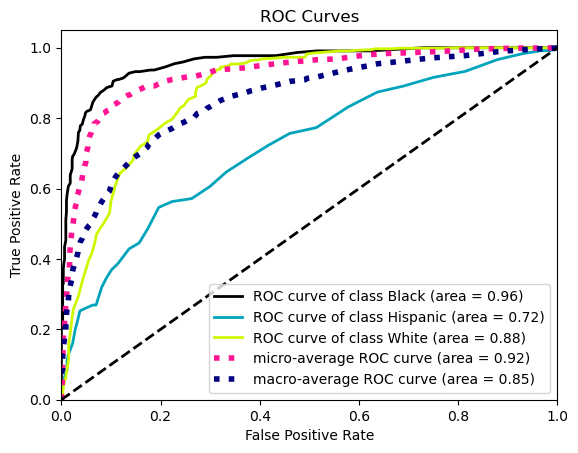

In [133]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_probe = pipe_model.predict_proba(X_test)

plot_roc(y_test, y_pred_probe)
plt.show();

### RF Model GridsearchCV

In [134]:
recall_Hispanic =  make_scorer(recall_score, pos_label='Hispanic', average=None, labels=["Hispanic"])

In [135]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state= 42))]

pipe_model = Pipeline(steps=operations)

In [136]:
# Define the parameter grid with the correct prefixes
param_grid = {'RF_model__n_estimators':[300 , 400, 500], 
             'RF_model__max_depth':[2, None],
             'RF_model__min_samples_split':[5, 10, 20],
             'RF_model__min_samples_leaf': [100],
             'RF_model__max_samples':[0.1, 0.2, 0.3]}

In [137]:
# Create the GridSearchCV object
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             scoring = recall_Hispanic,  
                             n_jobs=-1,
                             cv=10,
                             return_train_score=True,
                             verbose=2)


In [138]:
# Fit the GridSearchCV object
rf_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ColumnTransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClass...ed',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, None],
                         'RF_model__max_samples': [0.1, 0.2, 0.3],
                         'RF_model__min_samples_leaf': [100],
                         'RF_model__min_samples_split': [5, 10, 20],
                         'RF_model__n_estimators': [300, 400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, pos_label=Hispanic, average=None, labels=['Hispanic']),
             verbose=2)

In [139]:
rf_grid_model.best_params_

{'RF_model__max_depth': None,
 'RF_model__max_samples': 0.2,
 'RF_model__min_samples_leaf': 100,
 'RF_model__min_samples_split': 5,
 'RF_model__n_estimators': 500}

In [140]:
pd.DataFrame(rf_grid_model.cv_results_).loc[rf_grid_model.best_index_, 
                                            ['mean_test_score', 'mean_train_score']]

mean_test_score    0.631
mean_train_score   0.655
Name: 38, dtype: object

In [141]:
rf_grid_model.best_estimator_

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        max_samples=0.2, min_samples_leaf=100,
                                        min_samples_split=5, n_estimators=500,
                                        random_state=42))])

In [142]:
rf_grid_model.best_score_

0.6312943262411348

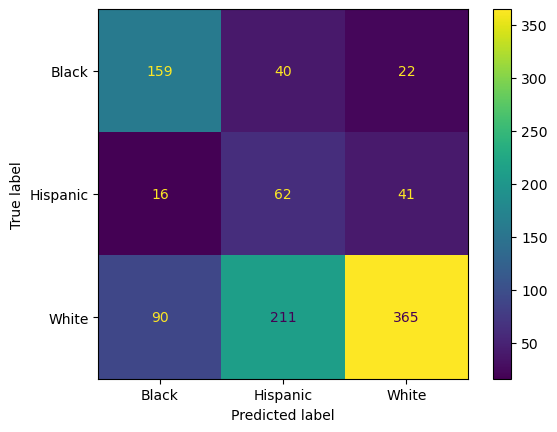

In [143]:
ConfusionMatrixDisplay.from_estimator(rf_grid_model, X_test, y_test);

In [144]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[159  40  22]
 [ 16  62  41]
 [ 90 211 365]]
              precision    recall  f1-score   support

       Black       0.60      0.72      0.65       221
    Hispanic       0.20      0.52      0.29       119
       White       0.85      0.55      0.67       666

    accuracy                           0.58      1006
   macro avg       0.55      0.60      0.54      1006
weighted avg       0.72      0.58      0.62      1006


Train_Set
[[ 659  127  100]
 [  57  307  110]
 [ 255  879 1528]]
              precision    recall  f1-score   support

       Black       0.68      0.74      0.71       886
    Hispanic       0.23      0.65      0.34       474
       White       0.88      0.57      0.69      2662

    accuracy                           0.62      4022
   macro avg       0.60      0.66      0.58      4022
weighted avg       0.76      0.62      0.66      4022



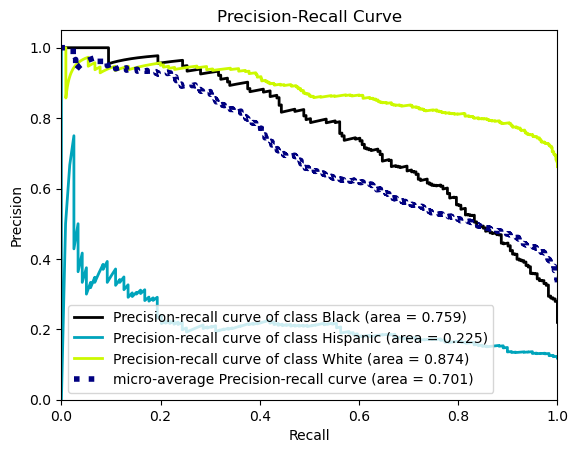

In [145]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     max_depth= None,
                                                     max_samples= 0.3,
                                                     min_samples_leaf= 100,
                                                     min_samples_split= 5,
                                                     n_estimators= 300, 
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [146]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.12856623744508497

In [147]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])


print(rf_AP)
print(rf_precision)
print(rf_recall)

0.12856623744508497
[0.19808307]
[0.5210084]


## 4. XGBoost

### Vanilla XGBoost Model

In [148]:
from xgboost import XGBClassifier

In [149]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                 ("XGB_model", XGBClassifier(random_state=42))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

y_train_xgb = y_train.map({"Black":0, "Hispanic":1, "White":2})
y_test_xgb = y_test.map({"Black":0, "Hispanic":1, "White":2})

pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callb...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [150]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[190   4  27]
 [  8  35  76]
 [ 13   6 647]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       221
           1       0.78      0.29      0.43       119
           2       0.86      0.97      0.91       666

    accuracy                           0.87      1006
   macro avg       0.85      0.71      0.74      1006
weighted avg       0.86      0.87      0.85      1006


Train_Set
[[ 886    0    0]
 [   0  474    0]
 [   0    0 2662]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       886
           1       1.00      1.00      1.00       474
           2       1.00      1.00      1.00      2662

    accuracy                           1.00      4022
   macro avg       1.00      1.00      1.00      4022
weighted avg       1.00      1.00      1.00      4022



In [151]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', 
                                                     y=y_train_xgb)
classes_weights

array([2.82841069, 1.5131678 , 2.82841069, ..., 0.50363135, 0.50363135,
       0.50363135])

In [152]:
my_dict = {"weights": classes_weights, "label":y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

weights  label
765     2.828      1
3738    1.513      0
1419    2.828      1
48      0.504      2
3056    0.504      2

In [153]:
comp.groupby("label").value_counts()

# weight x class is equal to this result.

label  weights
0      1.513       886
1      2.828       474
2      0.504      2662
Name: count, dtype: int64

In [154]:
pipe_model_xgb.fit(X_train,
                   y_train_xgb,  
                   XGB_model__sample_weight=classes_weights)

# weight parameter in XGBoost is per instance not per class. Therefore, I need to assign the weight of each class to its 
# instances, which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callb...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [155]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[190   8  23]
 [  6  53  60]
 [ 18  14 634]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       221
           1       0.71      0.45      0.55       119
           2       0.88      0.95      0.92       666

    accuracy                           0.87      1006
   macro avg       0.83      0.75      0.78      1006
weighted avg       0.86      0.87      0.86      1006


Train_Set
[[ 886    0    0]
 [   0  474    0]
 [   0    0 2662]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       886
           1       1.00      1.00      1.00       474
           2       1.00      1.00      1.00      2662

    accuracy                           1.00      4022
   macro avg       1.00      1.00      1.00      4022
weighted avg       1.00      1.00      1.00      4022



In [156]:
scoring_xgb = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =[1]),
               "recall_Hispanic" : make_scorer(recall_score, average = None, labels =[1]),
               "f1_Hispanic" : make_scorer(f1_score, average = None, labels =[1])}

In [157]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                 ("XGB_model", XGBClassifier(random_state=42))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, 
                        X_train, 
                        y_train_xgb, 
                        scoring=scoring_xgb,
                        cv=5, 
                        return_train_score=True,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic    0.663
train_precision_Hispanic   1.000
test_recall_Hispanic       0.418
train_recall_Hispanic      1.000
test_f1_Hispanic           0.512
train_f1_Hispanic          1.000
dtype: float64

### XGBoost Model GridsearchCV

In [158]:
param_grid = {"XGB_model__n_estimators":[70, 80],
              'XGB_model__max_depth':[1, 2],
              "XGB_model__learning_rate": [0.0001,0.001],
              "XGB_model__colsample_bytree":[0.5,0.7, 1]} 

In [159]:
operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBClassifier(random_state=42))]


model = Pipeline(steps=operations)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=make_scorer(precision_score, average = None, labels =[1]),
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True)

In [160]:
xgb_grid_model.fit(X_train,
                   y_train_xgb,
                   XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('XGB_model',
                                        XGBClassifier(base_s...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.5, 0.7, 1],
                         'XGB_model__learning_rate': [0.0001, 0.001],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [70, 80]},
             return_train_score=True,
             scoring=make_scorer(precision_score, average=None, labels=[1]))

In [161]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callb...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.001, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=2,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=80,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [162]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.5,
 'XGB_model__learning_rate': 0.001,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 80}

In [163]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.226
mean_train_score   0.258
Name: 7, dtype: object

In [164]:
xgb_grid_model.best_score_

0.22573226155190834

In [165]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[146  49  26]
 [ 16  58  45]
 [ 95 190 381]]
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       221
           1       0.20      0.49      0.28       119
           2       0.84      0.57      0.68       666

    accuracy                           0.58      1006
   macro avg       0.54      0.57      0.52      1006
weighted avg       0.71      0.58      0.62      1006


Train_Set
[[ 629  166   91]
 [  45  312  117]
 [ 262  767 1633]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       886
           1       0.25      0.66      0.36       474
           2       0.89      0.61      0.73      2662

    accuracy                           0.64      4022
   macro avg       0.60      0.66      0.59      4022
weighted avg       0.76      0.64      0.67      4022



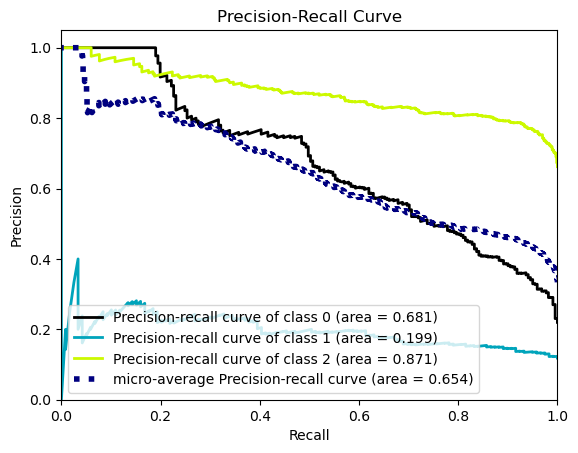

In [166]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_roc, plot_precision_recall

operations_xgb = [("OrdinalEncoder", column_trans), 
                 ("XGB_model", XGBClassifier(random_state=42,
                                             max_depth = 2,
                                             n_estimators = 80,
                                             colsample_bytree = 0.5,
                                             learning_rate = 0.0001
                                            ))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, 
          y_train_xgb, 
          XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()


In [167]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [168]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.19902701040662957

In [169]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_precision = precision_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

---
---

## Comparing Models

In [170]:
compare= pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                       "Precision": [log_precision[0], svc_precision[0], rf_precision[0], xgb_precision[0]],
                       "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                       "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

compare

Model  Precision  Recall    AP
0  Logistic Regression      0.810   0.538 0.681
1                  SVM      0.529   0.756 0.439
2        Random Forest      0.198   0.521 0.129
3              XGBoost      0.195   0.487 0.199

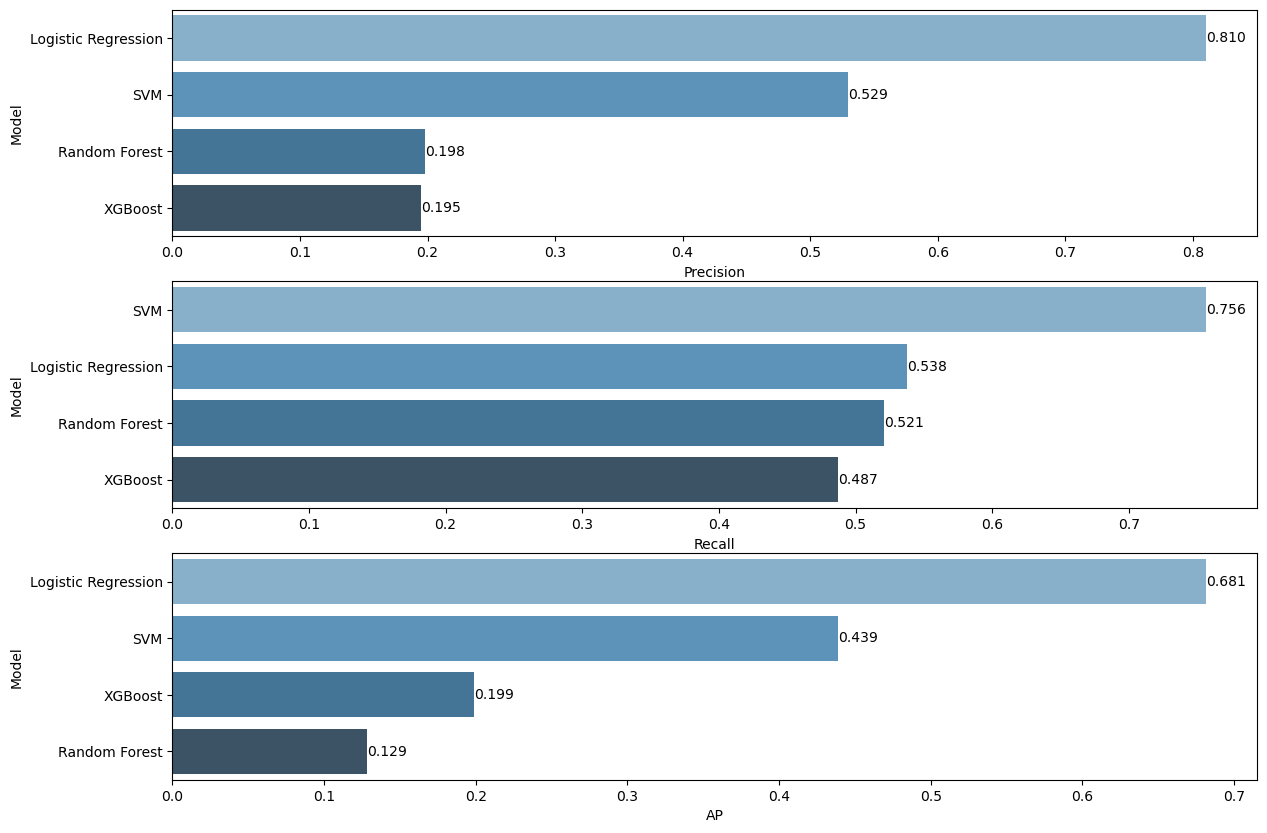

In [171]:
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

## Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

**When attempting to increase the precision for the Hispanic class in the dataset, it was found that Logistic Regression yielded the best results among the implemented machine learning algorithms, resulting in a decision to proceed with it.**

In [172]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                            sparse_output=False), cat),
                                              remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final), 
                    ("logistic", LogisticRegression(class_weight = 'balanced', C = 0.4, solver = "liblinear",
                                              penalty = 'l1',
                                              random_state = 42))]

final_model = Pipeline(steps=operations_final)
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('logistic',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [173]:
X[X['Gender'] =="Male"].describe()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
count                        3259.000        3259.000               3259.000   
mean                          247.660        1434.786                334.022   
std                            31.703          58.734                 16.641   
min                           163.000        1194.000                270.000   
25%                           224.500        1395.000                323.000   
50%                           245.000        1434.000                334.000   
75%                           270.000        1473.000                345.000   
max                           358.000        1683.000                393.000   

       anklecircumference  axillaheight  balloffootcircumference  \
count            3259.000      3259.000                 3259.000   
mean              227.080      1324.543                  250.172   
std                12.834        56.111                   11.780   
min               190.000      1106.000                  206.000   
25%               218.000      1287.000                  242.000   
50%               227.000      1324.000                  250.000   
75%               235.000      1360.500                  258.000   
max               281.000      1553.000                  297.000   

       balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
count          3259.000           3259.000                   3259.000   
mean            200.007            413.171                    351.635   
std               9.840             17.465                     30.107   
min             167.000            343.000                    246.000   
25%             193.000            402.000                    331.000   
50%             200.000            413.000                    352.000   
75%             206.000            425.000                    372.000   
max             233.000            471.000                    456.000   

       bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
count          3259.000          3259.000            3259.000   
mean            272.769           503.944              74.317   
std              15.855            27.261               3.799   
min             219.000           405.000              60.000   
25%             262.000           486.000              72.000   
50%             273.000           504.000              74.000   
75%             284.000           522.000              77.000   
max             332.000           604.000              88.000   

       bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
count          3259.000                   3259.000            3259.000   
mean            329.431                    312.967             141.535   
std              13.044                     15.239               5.741   
min             284.000                    264.000             120.000   
25%             321.000                    303.000             138.000   
50%             330.000                    313.000             142.000   
75%             338.000                    323.000             145.000   
max             378.000                    374.000             161.000   

       buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
count              3259.000      3259.000       3259.000           3259.000   
mean               1004.097       240.577        884.596            614.262   
std                  62.696        22.249         47.653             27.283   
min                 770.000       174.000        716.000            518.000   
25%                 962.000       224.000        851.000            596.000   
50%                1007.000       242.000        882.000            614.000   
75%                1049.000       256.000        915.000            633.000   
max                1197.000       312.000       1080.000            716.000   

       buttockpopliteallength  calfcircumference  

In [174]:
male_mean_human = X[X.Gender=="Male"].describe(include="all").loc["mean"]
male_mean_human

abdominalextensiondepthsitting    247.660
acromialheight                   1434.786
acromionradialelength             334.022
anklecircumference                227.080
axillaheight                     1324.543
balloffootcircumference           250.172
balloffootlength                  200.007
biacromialbreadth                 413.171
bicepscircumferenceflexed         351.635
bicristalbreadth                  272.769
bideltoidbreadth                  503.944
bimalleolarbreadth                 74.317
bitragionchinarc                  329.431
bitragionsubmandibulararc         312.967
bizygomaticbreadth                141.535
buttockcircumference             1004.097
buttockdepth                      240.577
buttockheight                     884.596
buttockkneelength                 614.262
buttockpopliteallength            500.722
calfcircumference                 386.456
cervicaleheight                  1511.592
chestbreadth                      286.949
chestcircumference               1

In [175]:
male_mean_human["Gender"] = "Male"
male_mean_human["subjectsbirthlocation"] = "California"
male_mean_human["writingpreference"] = "Right hand"

In [176]:
pd.DataFrame(male_mean_human).T

abdominalextensiondepthsitting acromialheight acromionradialelength  \
mean                        247.660       1434.786               334.022   

     anklecircumference axillaheight balloffootcircumference balloffootlength  \
mean            227.080     1324.543                 250.172          200.007   

     biacromialbreadth bicepscircumferenceflexed bicristalbreadth  \
mean           413.171                   351.635          272.769   

     bideltoidbreadth bimalleolarbreadth bitragionchinarc  \
mean          503.944             74.317          329.431   

     bitragionsubmandibulararc bizygomaticbreadth buttockcircumference  \
mean                   312.967            141.535             1004.097   

     buttockdepth buttockheight buttockkneelength buttockpopliteallength  \
mean      240.577       884.596           614.262                500.722   

     calfcircumference cervicaleheight chestbreadth chestcircumference  \
mean           386.456        1511.592      286.949           1041.118   

     chestdepth chestheight crotchheight crotchlengthomphalion  \
mean    248.901    1286.393      843.606               615.483   

     crotchlengthposterioromphalion earbreadth earlength earprotrusion  \
mean                        354.023     36.005    63.830        23.079   

     elbowrestheight eyeheightsitting footbreadthhorizontal footlength  \
mean         242.603          801.876               101.087    269.959   

     forearmcenterofgriplength forearmcircumferenceflexed  \
mean                   347.373                    306.261   

     forearmforearmbreadth forearmhandlength functionalleglength handbreadth  \
mean               570.711           478.222            1124.572      87.846   

     handcircumference handlength headbreadth headcircumference headlength  \
mean           211.218    192.361     153.644           572.722    199.192   

     heelanklecircumference heelbreadth hipbreadth hipbreadthsitting  \
mean                340.923      71.740    341.383           373.498   

     iliocristaleheight interpupillarybreadth interscyei interscyeii  \
mean           1058.169               637.025    426.297     446.249   

     kneeheightmidpatella kneeheightsitting lateralfemoralepicondyleheight  \
mean              486.441           551.576                        489.869   

     lateralmalleolusheight lowerthighcircumference mentonsellionlength  \
mean                 72.534                 402.811             122.249   

     neckcircumference neckcircumferencebase overheadfingertipreachsitting  \
mean           393.306               430.524                      1420.396   

     palmlength poplitealheight radialestylionlength shouldercircumference  \
mean    115.886         429.297              266.873              1166.512   

     shoulderelbowlength shoulderlength sittingheight sleevelengthspinewrist  \
mean             362.604        149.187       915.441                891.227   

     sleeveoutseam     span  stature suprasternaleheight tenthribheight  \
mean       591.137 1806.753 1750.545            1432.668       1116.087   

     thighcircumference thighclearance thumbtipreach tibialheight  \
mean            613.618        177.543       807.546      466.469   

     tragiontopofhead trochanterionheight verticaltrunkcircumferenceusa  \
mean          130.882             897.860                      1648.255   

     waistbacklength waistbreadth waistcircumference waistdepth  \
mean         473.939      319.875            919.067    231.294   

     waistfrontlengthsitting waistheightomphalion weightkg wristcircumference  \
mean                 384.030             1054.311   82.246            174.615   

     wristheight Gender SubjectsBirthLocation    Age WritingPreference  \
mean     843.136   Male                   NaN 29.753               NaN   

     subjectsbirthlocation writingpreference  
mean            California        Right hand

In [177]:
final_model.predict(pd.DataFrame(male_mean_human).T)

array(['White'], dtype=object)

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [178]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.803826085369228

In [179]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.803765923566879

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [180]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [181]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                      sparse=False), cat), 
                                                      remainder=MinMaxScaler())

In [182]:
X_train_one_hot = column_trans.fit_transform(X_train)

In [183]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_one_hot, y_train)

In [184]:
X_train_over.shape

(7986, 156)

In [185]:
y_train_over.value_counts()

DODRace
Hispanic    2662
Black       2662
White       2662
Name: count, dtype: int64

In [187]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_one_hot, y_train)

In [188]:
X_train_under.shape

(1422, 156)

In [189]:
y_train_under.value_counts()

DODRace
Black       474
Hispanic    474
White       474
Name: count, dtype: int64

In [190]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [191]:
y_train.value_counts()

DODRace
White       2662
Black        886
Hispanic     474
Name: count, dtype: int64

In [192]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_one_hot, y_train)
y_resampled_over.value_counts()

DODRace
White       2662
Hispanic    1000
Black        886
Name: count, dtype: int64

In [194]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_one_hot, y_train)
y_resampled_under.value_counts()

DODRace
White       2500
Black        886
Hispanic     474
Name: count, dtype: int64

In [196]:
steps = [('o', over), ('u', under)]


pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_train_one_hot, y_train)
y_resampled.value_counts()

DODRace
White       2500
Hispanic    1000
Black        886
Name: count, dtype: int64

In [197]:
y_train.value_counts()

DODRace
White       2662
Black        886
Hispanic     474
Name: count, dtype: int64

## Logistic Regression Over/ Under Sampling

In [241]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                      sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [242]:
operations = [("OneHotEncoder",column_trans), 
              ('o', over),
              ('u', under), 
              ("log", LogisticRegression(class_weight = 'balanced', C = 0.4, solver = "liblinear",
                                              penalty = 'l1',
                                              random_state = 42))] #("scaler", MinMaxScaler())

In [243]:
smote_pipeline = Pipeline(steps=operations)

In [244]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(random_state=42, sampling_strategy='minority')),
                ('u',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy={'Black': 886,
                                                       'Hispanic': 474,
                                                       'White': 2000})),
                ('log',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [245]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Train_Set
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92       886
    Hispanic       0.69      0.65      0.67       474
       White       0.93      0.93      0.93      2662

    accuracy                           0.90      4022
   macro avg       0.84      0.84      0.84      4022
weighted avg       0.90      0.90      0.90      4022


Test_Set
              precision    recall  f1-score   support

       Black       0.86      0.90      0.88       221
    Hispanic       0.70      0.65      0.67       119
       White       0.93      0.93      0.93       666

    accuracy                           0.89      1006
   macro avg       0.83      0.82      0.83      1006
weighted avg       0.89      0.89      0.89      1006



#  SHAP
- http://archive.today/2024.02.04-155206/https://towardsdatascience.com/shapley-values-clearly-explained-a7f7ef22b104
- https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [212]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                           sparse=False), cat), 
                                             remainder=MinMaxScaler(),
                                             verbose_feature_names_out=False)

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(C=0.4,
                                class_weight='balanced',
                                random_state=101,
                                penalty="l1",
                                solver='saga')

model_shap.fit(X_train_trans, y_train)

LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                   random_state=101, solver='saga')

In [213]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Train_Set
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       886
    Hispanic       0.52      0.81      0.63       474
       White       0.96      0.86      0.90      2662

    accuracy                           0.87      4022
   macro avg       0.80      0.87      0.82      4022
weighted avg       0.90      0.87      0.88      4022


Test_Set
              precision    recall  f1-score   support

       Black       0.90      0.89      0.90       221
    Hispanic       0.49      0.82      0.61       119
       White       0.95      0.84      0.89       666

    accuracy                           0.85      1006
   macro avg       0.78      0.85      0.80      1006
weighted avg       0.89      0.85      0.86      1006



In [214]:
operations = [("OneHotEncoder", column_trans_shap),
              ("log", LogisticRegression(C=0.4,
                                         class_weight='balanced',
                                         random_state=101,
                                         penalty="l1",
                                         solver='saga'))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train, 
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# no overfitting .

test_precision_macro    0.781
train_precision_macro   0.796
test_recall_macro       0.844
train_recall_macro      0.866
test_f1_macro           0.801
train_f1_macro          0.819
dtype: float64

In [215]:
features = column_trans_shap.get_feature_names_out()
features

array(['Gender_Female', 'Gender_Male', 'SubjectsBirthLocation_Alabama',
       'SubjectsBirthLocation_Arizona', 'SubjectsBirthLocation_Arkansas',
       'SubjectsBirthLocation_California',
       'SubjectsBirthLocation_Colombia', 'SubjectsBirthLocation_Colorado',
       'SubjectsBirthLocation_Connecticut',
       'SubjectsBirthLocation_Delaware',
       'SubjectsBirthLocation_District of Columbia',
       'SubjectsBirthLocation_Dominican Republic',
       'SubjectsBirthLocation_Florida', 'SubjectsBirthLocation_Georgia',
       'SubjectsBirthLocation_Germany', 'SubjectsBirthLocation_Haiti',
       'SubjectsBirthLocation_Hawaii', 'SubjectsBirthLocation_Idaho',
       'SubjectsBirthLocation_Illinois', 'SubjectsBirthLocation_Indiana',
       'SubjectsBirthLocation_Iowa', 'SubjectsBirthLocation_Jamaica',
       'SubjectsBirthLocation_Kansas', 'SubjectsBirthLocation_Kentucky',
       'SubjectsBirthLocation_Louisiana', 'SubjectsBirthLocation_Maine',
       'SubjectsBirthLocation_Maryland',
  

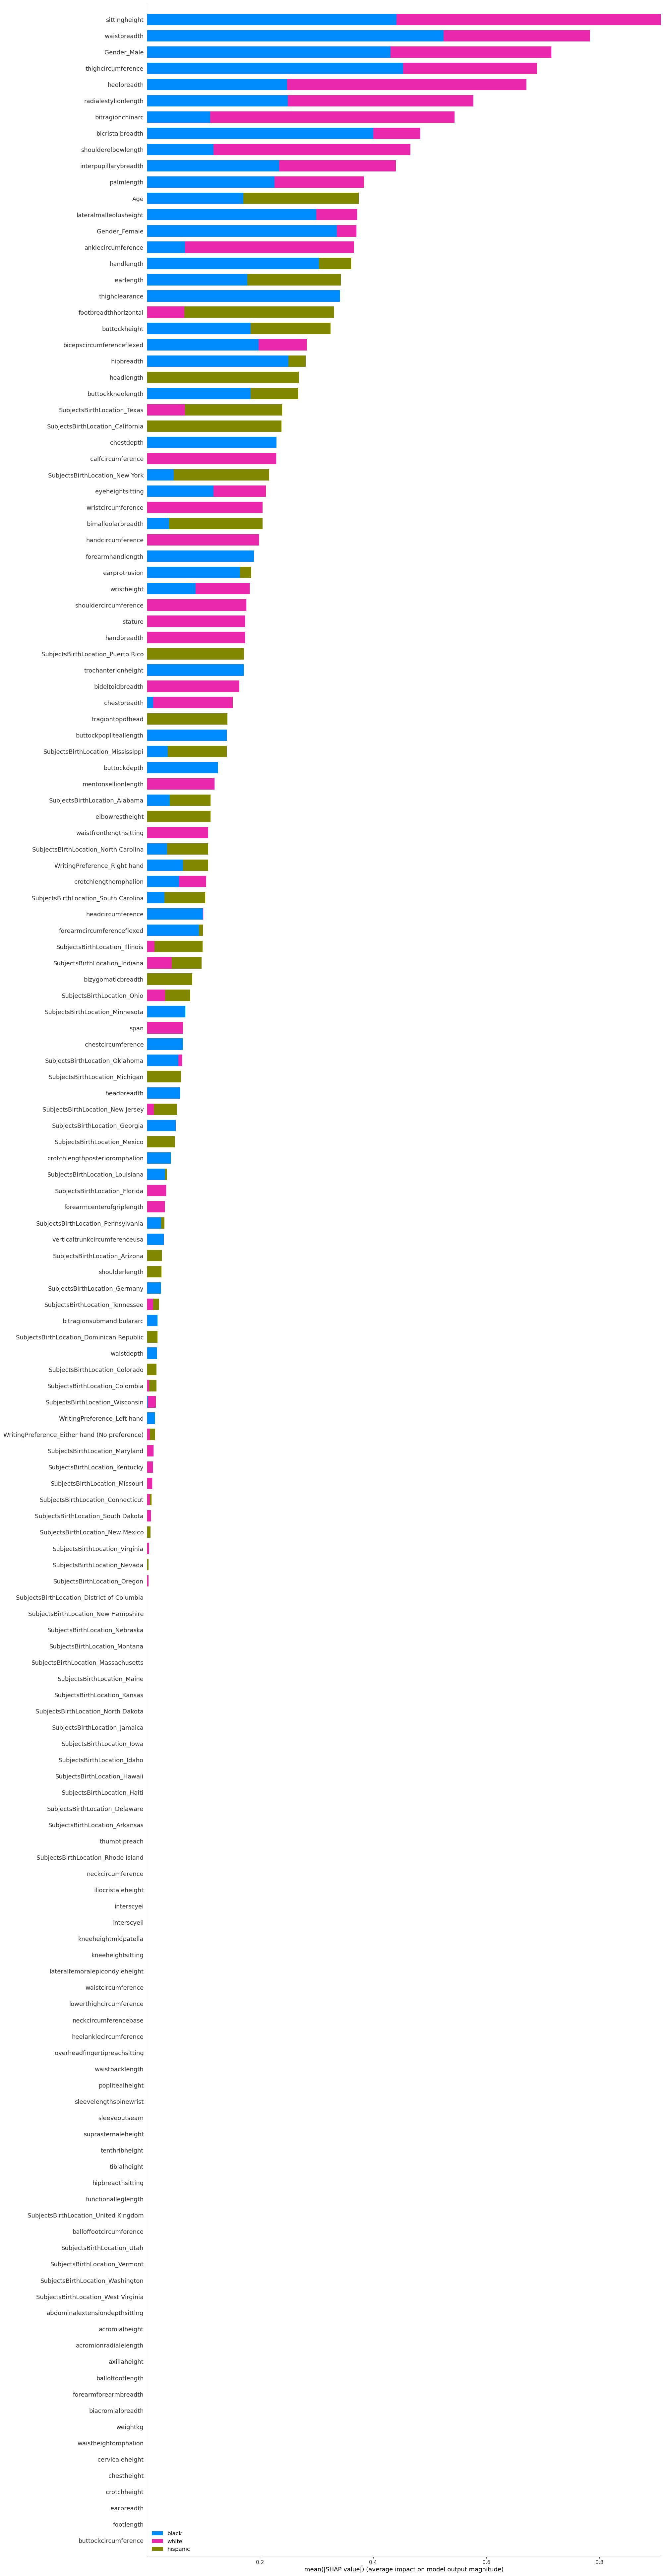

In [218]:
import shap

explainer = shap.LinearExplainer(model_shap, X_train_trans) 

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values, 
                  max_display=300, 
                  feature_names = features, 
                  plot_size=(20,100), 
                  class_names=["black", "hispanic", "white"])

# blue-black, pink-white and green-hispanic

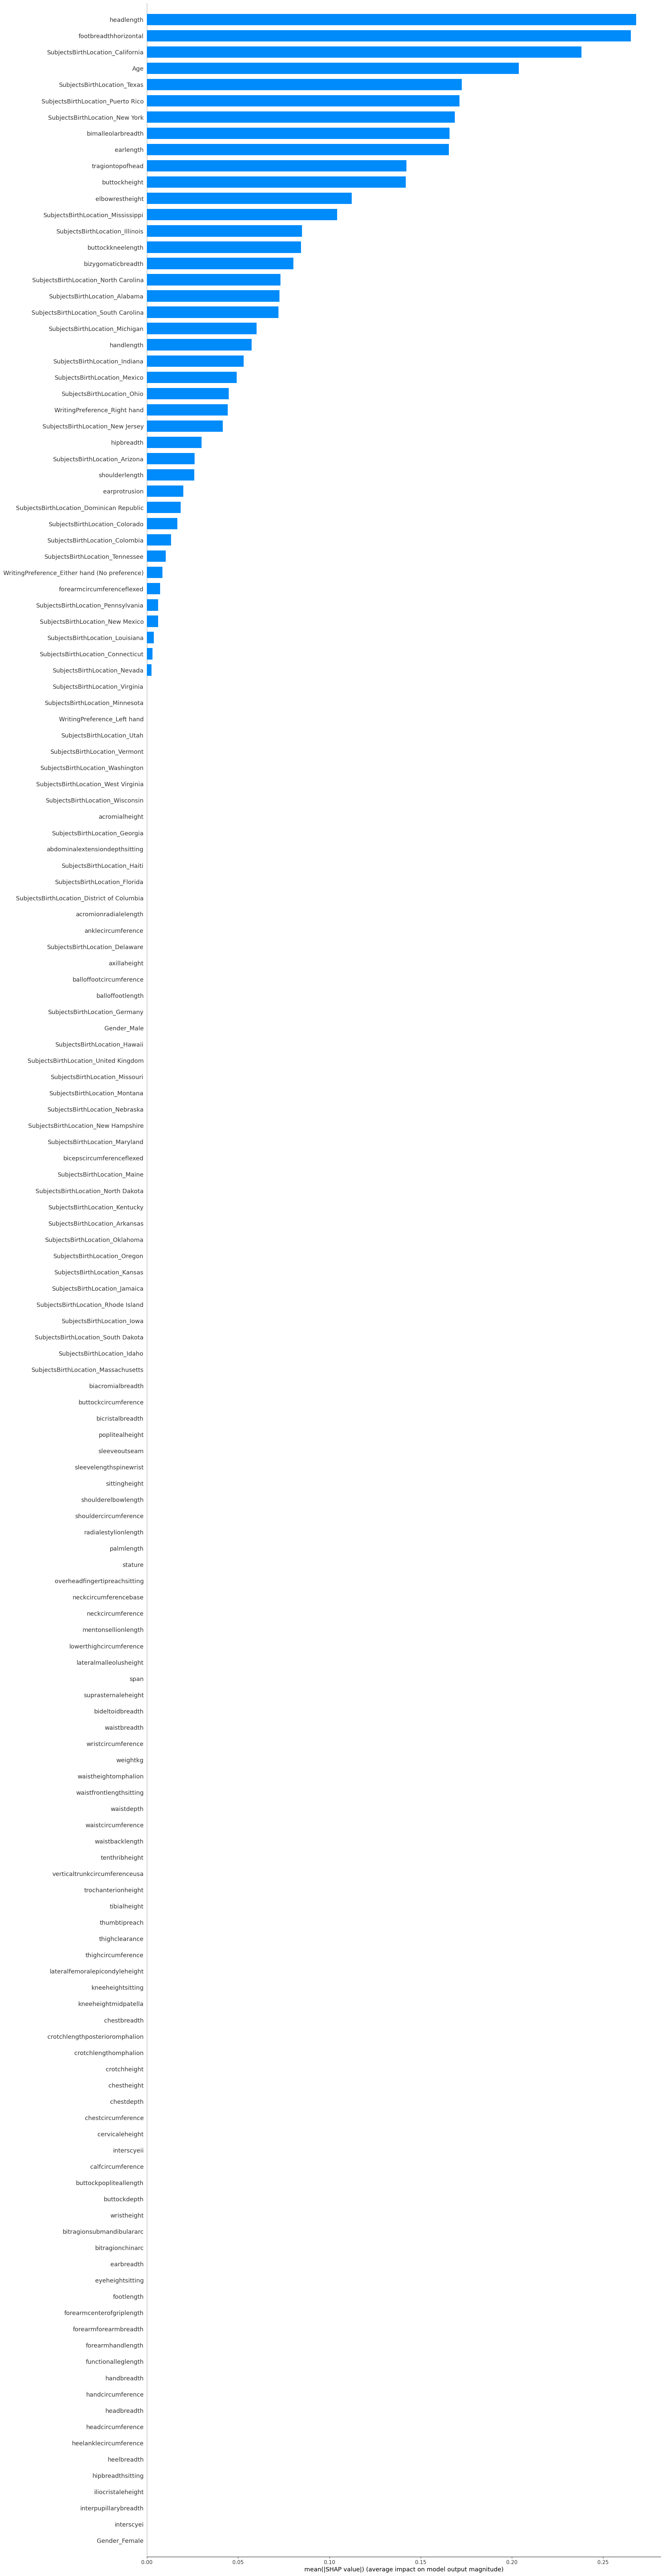

In [219]:
shap.summary_plot(shap_values[1], 
                  max_display=300, 
                  feature_names = features, 
                  plot_size=(20,100), 
                  plot_type="bar") 

In [228]:
hispanic=['headlength',
          'footbreadthhorizontal',
          'Age',
          'bimalleolarbreadth', 
          'buttockkneelength',
          'SubjectsBirthLocation',
          'mentonsellionlength',
          'elbowrestheight',
          'bizygomaticbreadth',
          'earlength',
          'wristcircumference',
          'handlength',
          'bitragionsubmandibulararc',
          'buttockheight',
          'tragiontopofhead'
          ]  

In [229]:
len(hispanic)

15

In [230]:
X2 = X[hispanic]
X2.head()

headlength  footbreadthhorizontal  Age  bimalleolarbreadth  \
0         206                    101   41                  71   
1         201                     98   35                  67   
2         202                    103   42                  75   
3         199                    106   31                  73   
4         197                    111   21                  80   

   buttockkneelength SubjectsBirthLocation  mentonsellionlength  \
0                619          North Dakota                  118   
1                584              New York                  131   
2                623              New York                  123   
3                560             Wisconsin                  106   
4                706        North Carolina                  135   

   elbowrestheight  bizygomaticbreadth  earlength  wristcircumference  \
0              247                 142         71                 175   
1              232                 135         62                 167   
2              237                 135         61                 180   
3              272                 143         66                 176   
4              188                 138         56                 188   

   handlength  bitragionsubmandibulararc  buttockheight  tragiontopofhead  
0         193                        291            882               140  
1         195                        320            870               120  
2         203                        330            901               125  
3         194                        309            821               127  
4         218                        310           1080               122

In [231]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['SubjectsBirthLocation'], dtype='object')

In [232]:
X2.shape

(5028, 15)

In [233]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42, stratify =y)

In [234]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                           sparse=False), cat_new), 
                                             remainder=MinMaxScaler(),
                                             verbose_feature_names_out=False)

operations_shap = [("OneHotEncoder",column_trans_shap),
                   ("log", LogisticRegression(class_weight = 'balanced', C = 0.4, solver = "liblinear",
                                              penalty = 'l1',
                                              random_state = 42))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [235]:
X_test2

headlength  footbreadthhorizontal  Age  bimalleolarbreadth  \
3702         193                     93   27                  69   
4396         189                     92   28                  63   
5060         193                     93   25                  64   
885          193                    102   21                  74   
1386         185                     97   38                  72   
...          ...                    ...  ...                 ...   
1553         191                    103   22                  74   
2468         209                    100   26                  75   
3689         196                     95   25                  67   
4404         187                    102   40                  74   
3216         196                    103   24                  73   

      buttockkneelength SubjectsBirthLocation  mentonsellionlength  \
3702                647              New York                  121   
4396                542              Virginia                  110   
5060                587               Florida                  108   
885                 607              Virginia                  111   
1386                617                 Texas                  122   
...                 ...                   ...                  ...   
1553                629                  Iowa                  116   
2468                590               Florida                  125   
3689                586              New York                  112   
4404                613               Florida                  115   
3216                676              Oklahoma                  127   

      elbowrestheight  bizygomaticbreadth  earlength  wristcircumference  \
3702              226                 134         60                 158   
4396              208                 127         57                 147   
5060              199                 126         53                 146   
885               235                 141         61                 175   
1386              241                 157         63                 178   
...               ...                 ...        ...                 ...   
1553              214                 137         61                 180   
2468              261                 146         68                 170   
3689              254                 133         61                 153   
4404              241                 143         60                 167   
3216              204                 139         62                 172   

      handlength  bitragionsubmandibulararc  buttockheight  tragiontopofhead  
3702         187                        287            923               137  
4396         161                        298            751               132  
5060         184                        289            859               123  
885          193                        325            860               140  
1386         191                        337            886               119  
...          ...                        ...            ...               ...  
1553         191                        318            944               122  
2468         180                        307            828               131  
3689         184                        267            851               126  
4404         185                        291            871               126  
3216         195                        310            920               125  

[1006 rows x 15 columns]

In [236]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

Train_Set
              precision    recall  f1-score   support

       Black       0.73      0.78      0.75       886
    Hispanic       0.58      0.59      0.58       474
       White       0.87      0.85      0.86      2662

    accuracy                           0.80      4022
   macro avg       0.72      0.74      0.73      4022
weighted avg       0.80      0.80      0.80      4022


Test_Set
              precision    recall  f1-score   support

       Black       0.66      0.71      0.68       221
    Hispanic       0.56      0.63      0.59       119
       White       0.86      0.82      0.84       666

    accuracy                           0.77      1006
   macro avg       0.69      0.72      0.71      1006
weighted avg       0.78      0.77      0.78      1006



In [237]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, 
                        X_train2,
                        y_train2, 
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_macro    0.716
train_precision_macro   0.724
test_recall_macro       0.724
train_recall_macro      0.737
test_f1_macro           0.718
train_f1_macro          0.730
dtype: float64

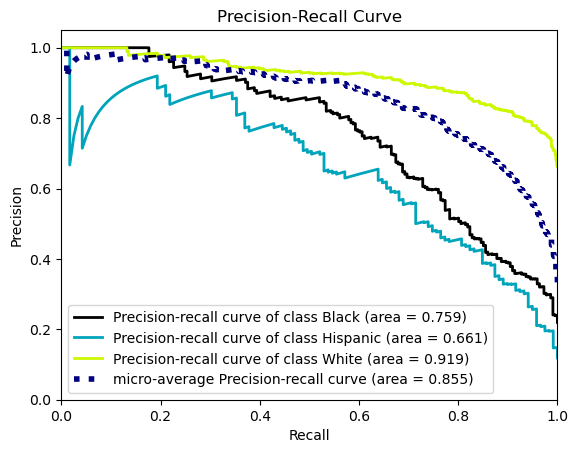

In [238]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


model = Pipeline(steps=operations_shap)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show();

## In Summary ##


Achieving high prediction accuracy requires a deep understanding of the dataset and investigating different strategies that may affect the dependent variable. The project's detailed plan is as follows:


Data Understanding: To start, use the pandas module to perform a methodical column-by-column analysis of the dataset. Get a thorough grasp of the properties of the data.

Domain Research: Use internet resources to carry out domain-specific research on body scales and racial features. This study will help you become more acquainted with the dataset quickly.

Algorithms for Machine Learning: Use the following algorithms for machine learning:

Evaluation of Logistic Regression, Support Vector Machine, XGBoost, Random Forest Models: Assess these models' effectiveness with the relevant performance measures. Evaluate how well they are able to forecast things.

Choose the model that works best out of all the implemented algorithms. Additional advancements will be built upon this model.

Performance Improvement: Apply the Synthetic Minority Over-sampling Technique (SMOTE) to improve the chosen model's prediction performance. This method will assist in addressing the problem of class imbalance.

Model Deployment: Get the selected model ready for implementation in practical applications.

Model Interpretation: To illustrate how the top-performing model generates predictions, apply the SHAP (SHapley Additive exPlanations) approach. This will shed light on the model's decision-making procedure.

To summarize, the project entails a thorough investigation of the dataset, the implementation of diverse machine learning algorithms, the assessment of models, the identification of the best performing model, model improvement by SMOTE, and the elucidation of the model's operation through SHAP. It's a methodical strategy to attaining excellent interpretability and forecast accuracy.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___